In [1]:
# Please make sure that you already imported data.

# summary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('haberman.csv')
data.shape

(305, 4)

In [4]:
data.head  #ลอง print ข้อมูลออกมาดู

<bound method NDFrame.head of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>

In [5]:
# พบว่าไม่มี column's name เลยจะ add เพิ่มเข้าไปเพื่อการเรียกใช้ที่สะดวก ดูชื่อจากข้อมูลที่อาจารย์ให้
data.columns = ['age', 'operation', 'axillary', 'survival']
data

,age,operation,axillary,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [6]:
data.describe() # ดูรายละเอียดของข้อมูล เห็นไดว่า Survival เป็น categorical 

,age,operation,axillary,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
data

,age,operation,axillary,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [8]:
df = data
df2 = df

In [9]:
#จะเปลี่ยนค่า 1 กับ 2 เป็น yes กับ no เพื่อให้โปรแกรมรู้ว่าปัจจัยนี้คือ categorical
df2['survival']= df2['survival'].map({ 1:'yes', 2:'no'})
df2 

,age,operation,axillary,survival
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
...,...,...,...,...
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no


In [10]:
#ดูรายละเอียดพวก mean std q1 q3 ของข้อมูลในแต่ละ feature
df2.describe()

,age,operation,axillary
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [11]:
# เนื่องจากในการแสดง describe มันจะไม่มี mode กับ med เลยต้องสั่งให้แสดงเพิ่มขึ้นมาเพื่อนำไปใช้ในการวิเคราะห์ข้อมูล
print(df2.mean())
print(df2.median())
print(df2.mode())

age          52.531148
operation    62.849180
axillary      4.036066
dtype: float64
age          52.0
operation    63.0
axillary      1.0
dtype: float64
   age  operation  axillary survival
0   52         58         0      yes


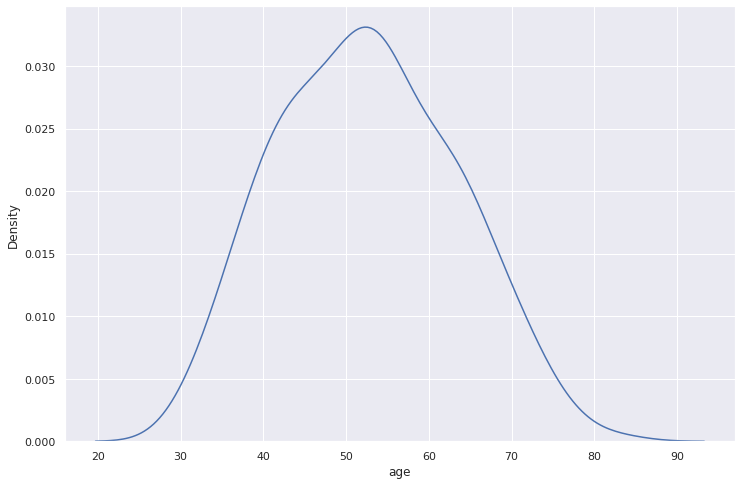

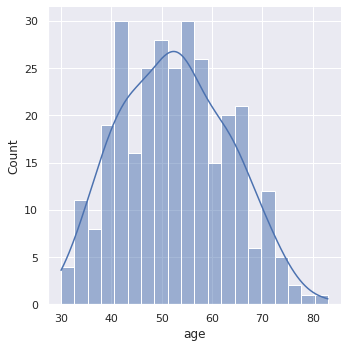

In [12]:
# แสดงกราฟ histogram ดูการกระจายตัวของข้อมูล
# ดูที่ feature = age //อายุคนไข้

sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(data['age'])
sns.displot(data['age'],kde=True, bins=20)

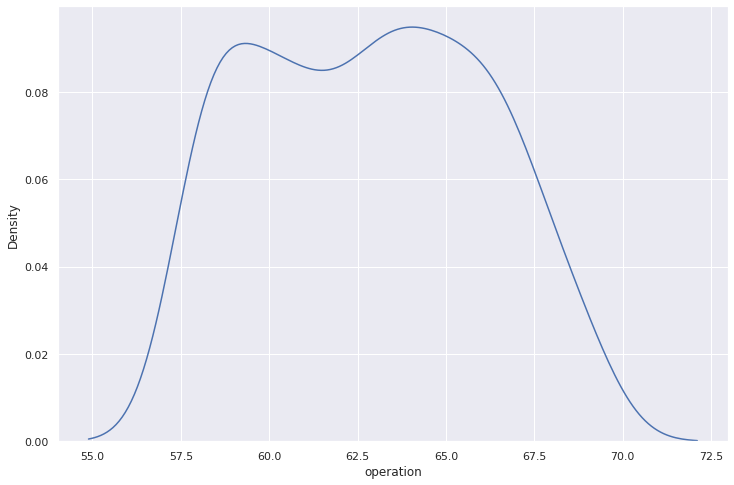

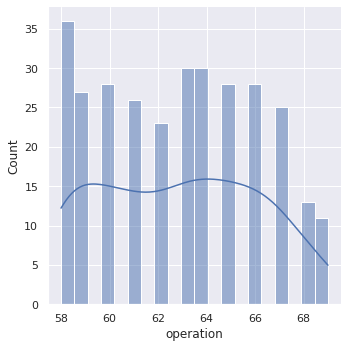

In [13]:
# แสดงกราฟ histogram ดูการกระจายตัวของข้อมูล
# ดูที่ feature = operation //ปีที่เข้ารับการผ่าตัด

sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(data['operation'])
sns.displot(data['operation'],kde=True, bins=20)

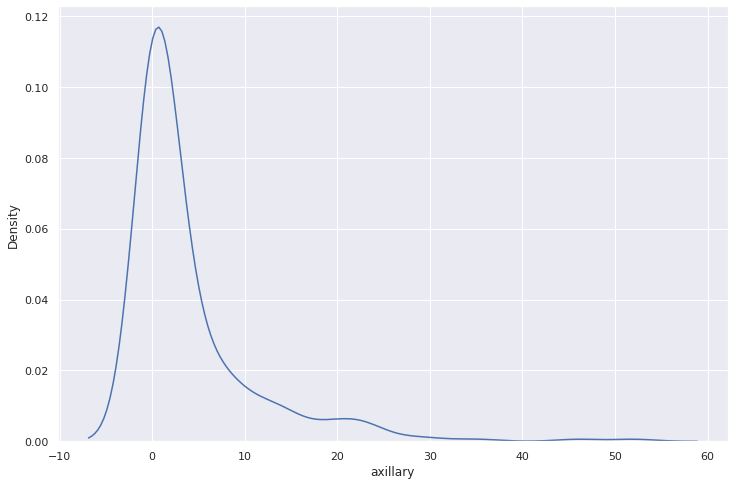

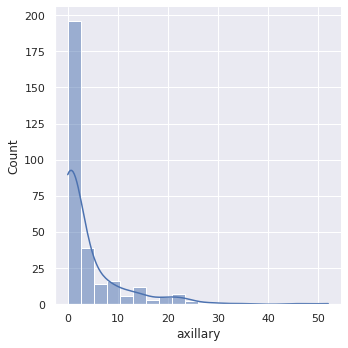

In [14]:
# แสดงกราฟ histogram ดูการกระจายตัวของข้อมูล
# ดูที่ feature = axillary //จำนวน Positive axillary node

sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(data['axillary'])
sns.displot(data['axillary'],kde=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd13330f590>,
      dtype=object)

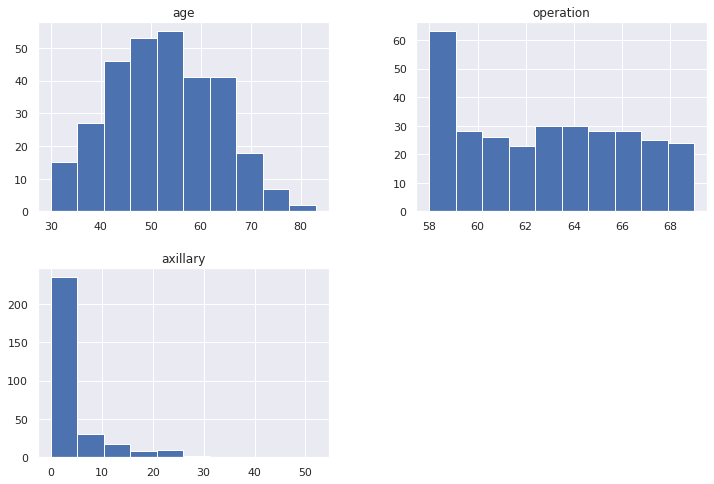

In [15]:
data.hist() # แสดง histogram ของข้อมูลแยกตาม feature

In [16]:
#จากที่ feature ที่ชื่อ survival เป็น categorical จึงจะดูว่ามีจำนวนเท่าไหร่ในแต่ละ class

df2['survival'].value_counts()

yes    224
no      81
Name: survival, dtype: int64

In [17]:
# ดูข้อมูลของผู้ที่ได้รับการผ่าตัดแล้วรอดชีวิตมาได้ตั้งแต่ 5 ปีขึ้นไป
survival_yes = df2[df2['survival']=='yes']
survival_yes.describe()

,age,operation,axillary
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [18]:
# ดูค่า mean, med, mode ในกลุ่มผู้รอดชีวิตมาได้ถึง 5 ปีขึ้นไป
print(survival_yes.mean())
print(survival_yes.median())
print(survival_yes.mode())

age          52.116071
operation    62.857143
axillary      2.799107
dtype: float64
age          52.0
operation    63.0
axillary      0.0
dtype: float64
   age  operation  axillary survival
0   50         58       0.0      yes
1   52         60       NaN      NaN


In [19]:
# ดูข้อมูลของผู้ที่ได้รับการผ่าตัดแล้วรอดชีวิตมาได้น้อยกว่า 5 ปี
survival_no = df2[df2['survival']=='no']
survival_no.describe()

,age,operation,axillary
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


In [20]:
# ดูค่า mean, med, mode ในกลุ่มผู้รอดชีวิตมาได้น้อยกว่า 5 ปี
print(survival_no.mean())
print(survival_no.median())
print(survival_no.mode())

age          53.679012
operation    62.827160
axillary      7.456790
dtype: float64
age          53.0
operation    63.0
axillary      4.0
dtype: float64
   age  operation  axillary survival
0   53         65         0       no


In [21]:
## ดูว่ามีค่า null หรือไม่ 
data.isnull().sum()

age          0
operation    0
axillary     0
survival     0
dtype: int64

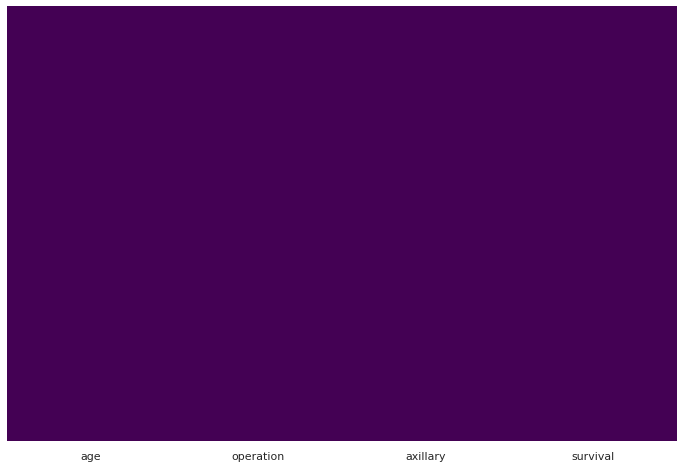

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# ลองให้แสดงแบบ heatmap เพื่อตรวจสอบว่ามีค่า null ใน dataset หรือเปล่า

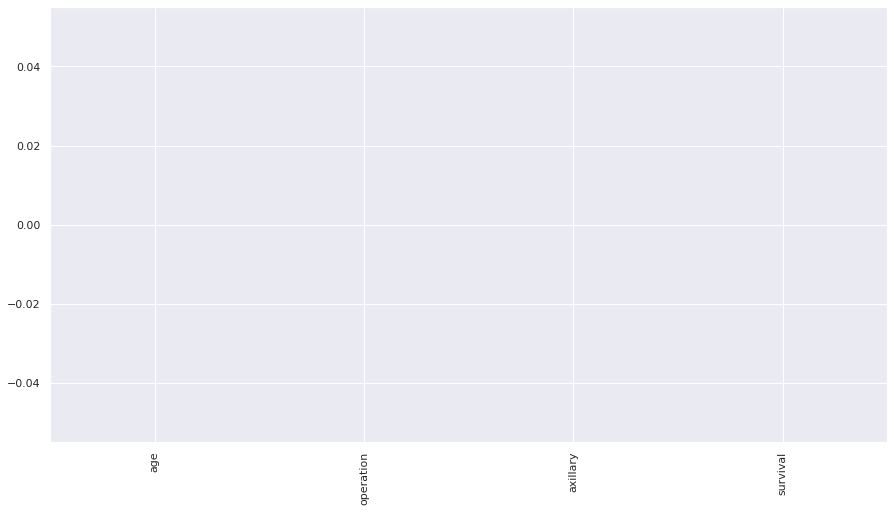

In [23]:
# ลองแสดงผลแบบใช้ bar graph
missing = data.isnull().sum()
#missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

# Outlier

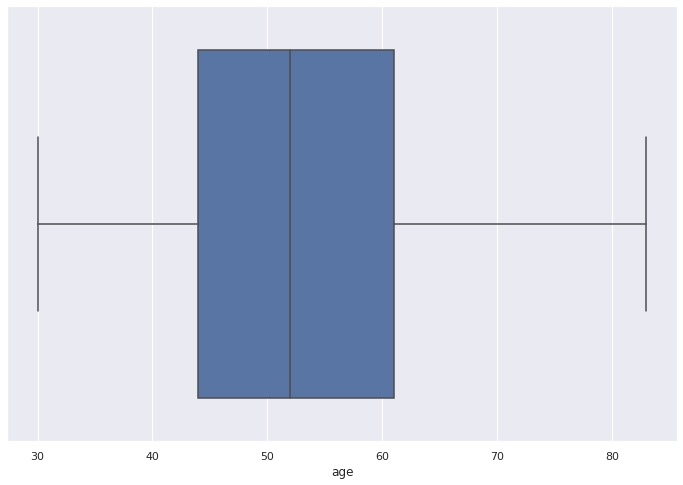

In [24]:
# แสดง Boxplot ของ feature ที่ชื่อ age
sns.boxplot(x='age', data=data)

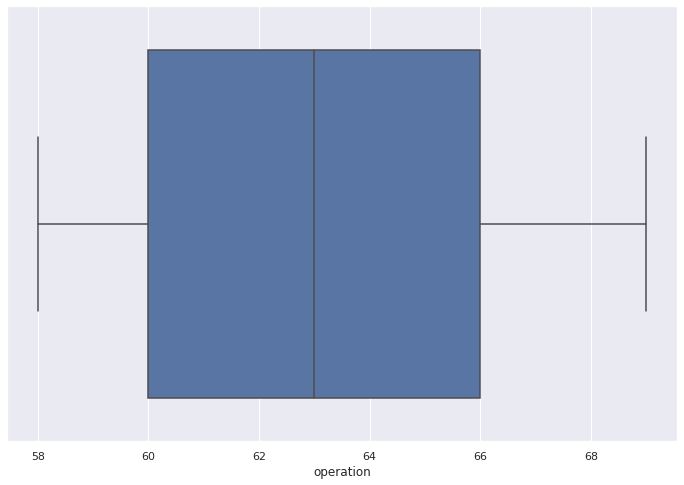

In [25]:
# แสดง Boxplot ของ feature ที่ชื่อ operation
sns.boxplot(x='operation', data=data)

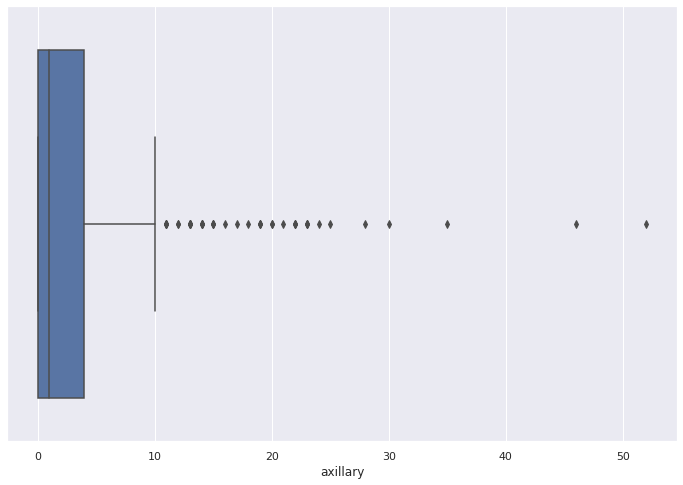

In [26]:
# แสดง Boxplot ของ feature ที่ชื่อ axillary //มี outliers
sns.boxplot(x='axillary', data=data)

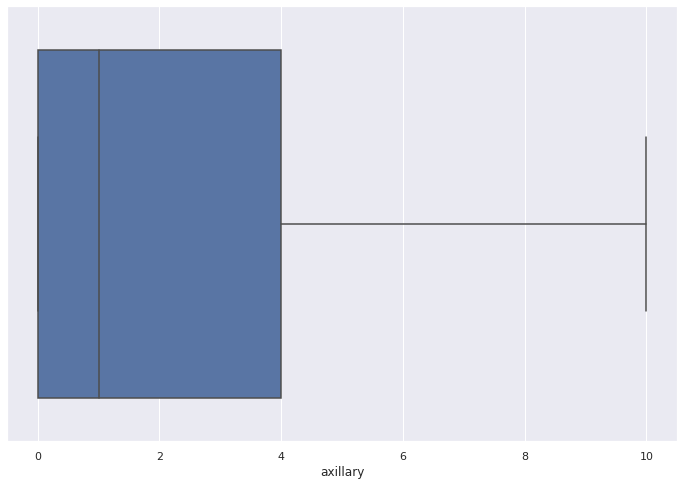

In [27]:
# แสดง Boxplot ของ feature ที่ชื่อ axillary //ตัด outliers ทิ้งแล้ว
sns.boxplot(x='axillary', data=data, showfliers=False)

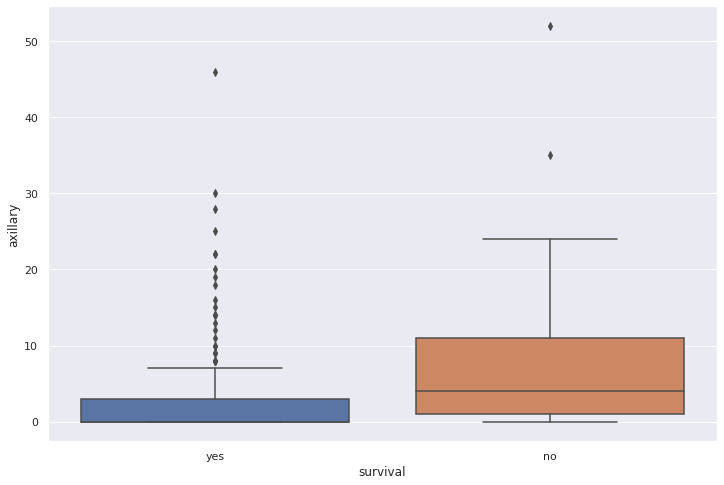

In [28]:
# แสดง Boxplot ของ feature ที่ชื่อ axillary แบบแยกตามประเภทของ survival //รวม outlier
chart = sns.boxplot(x='survival',y='axillary', data=data) 

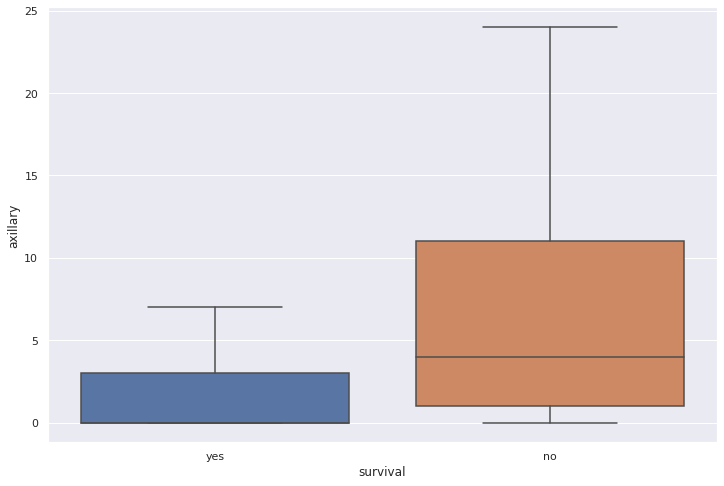

In [29]:
# แสดง Boxplot ของ feature ที่ชื่อ axillary แบบแยกตามประเภทของ survival //ไม่รวม outlier

chart = sns.boxplot(x='survival',y='axillary', data=data, showfliers=False)

In [30]:
# # จะเห็นได้ว่ามี Outlier ใน feature ที่ชื่อ axillary
# # ใช้ IQR ในการดู Outlier 

In [31]:
data.describe()

,age,operation,axillary
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [32]:
# แสดงวิธีการคำนวณหา Outliers ด้วย IQR

q1 = data.quantile(0.25) # เลือกค่าที่เป็นจุดของ Q1
q3 = data.quantile(0.75) # เลือกค่าที่เป็นจุดของ Q3
iqr = q3 - q1
iqr

age          17.0
operation     6.0
axillary      4.0
dtype: float64

In [33]:
# คำนวณดู lower outliers และ upper outliers ตามสูตร
low_outlier = q1-1.5*iqr
upp_outlier = q3+1.5*iqr

In [34]:
# แสดงผลของ lower outliers
low_outlier

age          18.5
operation    51.0
axillary     -6.0
dtype: float64

In [35]:
# แสดงผลของ Upper outliers
upp_outlier

age          86.5
operation    75.0
axillary     10.0
dtype: float64

In [36]:
# ดูข้อมูลที่มีค่ามากกว่า outlier
df3 = data[data['axillary'] >= upp_outlier['axillary']]
df3.head

<bound method NDFrame.head of      age  operation  axillary survival
4     33         58        10      yes
8     34         58        30      yes
10    34         61        10      yes
13    35         64        13      yes
21    37         60        15      yes
23    38         69        21       no
30    38         66        11      yes
42    41         60        23       no
58    42         62        20      yes
61    43         58        52       no
65    43         63        14      yes
74    44         63        19       no
78    44         67        16      yes
84    45         59        14      yes
91    46         65        20       no
95    47         63        23       no
105   47         66        12      yes
106   48         58        11       no
107   48         58        11       no
114   49         64        10       no
123   50         63        13       no
135   51         59        13       no
159   53         63        24       no
160   53         65        12     

In [37]:
# ดูรูปร่างของข้อมูล ต้องการที่จะดูว่ามีข้อมูลกี่ตัวที่เกินขอบเขต
df3.shape

(43, 4)

In [38]:
# เก็บข้อมูลที่ตัดพวก Outliers ทิ้งออกไปแล้วไปใส่ใน df4
data_no_outlier = data[(data.axillary>low_outlier['axillary'])&(data.axillary<upp_outlier['axillary'])]
df4 = data_no_outlier
df4

,age,operation,axillary,survival
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
5,33,60,0,yes
...,...,...,...,...
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no


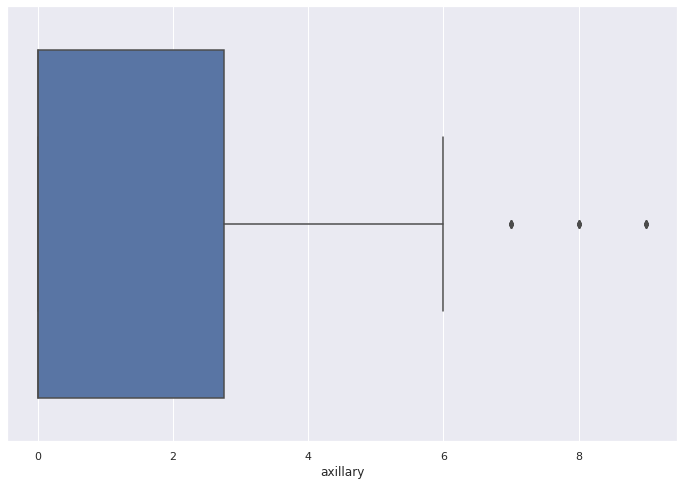

In [39]:
# แสดง boxplot ของข้อมูลบนปัจจัย axillary หลังจากที่ตัด outlier ออกแล้ว
sns.boxplot(x=df4['axillary'])

# Uni-variate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


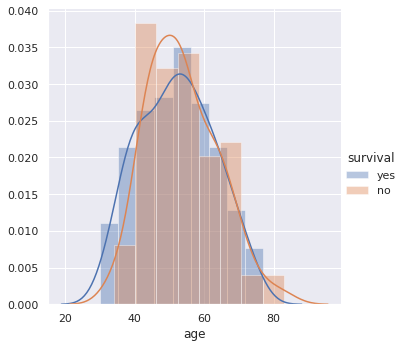

In [99]:
# แสดงกราฟ histogram เพื่อดูแนวโน้มความสะมพันธ์ของตัวแปร age ว่าสามารถเอาไปทำนายการรอดชีวิตได้มั้ย
sns.FacetGrid(data,hue='survival',height = 5)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.show()

In [46]:
# แสดงรายละเอียดของข้อมูลในตัวแปร age
data['age'].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: age, dtype: float64

In [55]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร age
print('mean: ',data['age'].mean())
print('med: ',data['age'].median())
print('mode: ',data['age'].mode())

mean:  52.5311475409836
med:  52.0
mode:  0    52
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


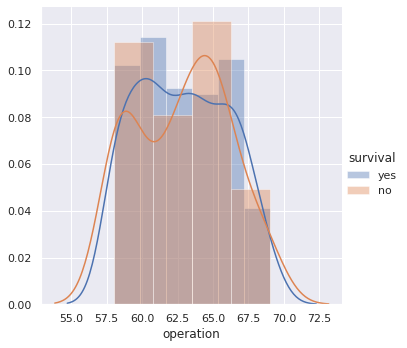

In [100]:
# แสดงกราฟ histogram เพื่อดูแนวโน้มความสะมพันธ์ของตัวแปร operation ว่าสามารถเอาไปทำนายการรอดชีวิตได้มั้ย
sns.FacetGrid(data,hue='survival',height = 5)\
 .map(sns.distplot,'operation')\
 . add_legend();
plt.show()

In [58]:
# แสดงรายละเอียดของข้อมูลในตัวแปร operation
df4['operation'].describe()

count    305.000000
mean      62.849180
std        3.254078
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: operation, dtype: float64

In [59]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร operation
print('mean: ',data['operation'].mean())
print('med: ',data['operation'].median())
print('mode: ',data['operation'].mode())

mean:  62.84918032786885
med:  63.0
mode:  0    58
dtype: int64


In [71]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร operation + survival=no
print('mean: ',survival_no['operation'].mean())
print('med: ',survival_no['operation'].median())
print('mode: ',survival_no['operation'].mode())

mean:  62.82716049382716
med:  63.0
mode:  0    65
dtype: int64


In [70]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร operation + survival=yes
print('mean: ',survival_yes['operation'].mean())
print('med: ',survival_yes['operation'].median())
print('mode: ',survival_yes['operation'].mode())

mean:  62.857142857142854
med:  63.0
mode:  0    58
1    60
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


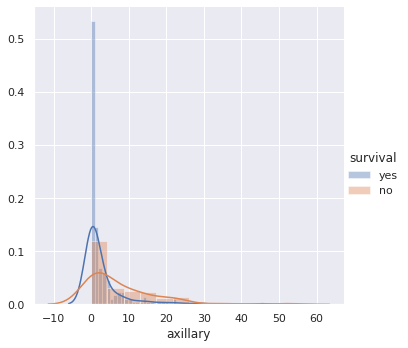

In [101]:
# แสดงกราฟ histogram เพื่อดูแนวโน้มความสะมพันธ์ของตัวแปร axillary ว่าสามารถเอาไปทำนายการรอดชีวิตได้มั้ย
sns.FacetGrid(data,hue='survival',height = 5)\
 .map(sns.distplot,'axillary')\
 . add_legend();
plt.show()

In [73]:
# แสดงรายละเอียดของข้อมูลในตัวแปร axillary
data['axillary'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axillary, dtype: float64

In [74]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร axillary
print('mean: ',data['axillary'].mean())
print('med: ',data['axillary'].median())
print('mode: ',data['axillary'].mode())

mean:  4.036065573770492
med:  1.0
mode:  0    0
dtype: int64


In [75]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร axillary + survival=no
print('mean: ',survival_no['axillary'].mean())
print('med: ',survival_no['axillary'].median())
print('mode: ',survival_no['axillary'].mode())

mean:  7.45679012345679
med:  4.0
mode:  0    0
dtype: int64


In [76]:
# ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร axillary + survival= yes
print('mean: ',survival_yes['axillary'].mean())
print('med: ',survival_yes['axillary'].median())
print('mode: ',survival_yes['axillary'].mode())

mean:  2.799107142857143
med:  0.0
mode:  0    0
dtype: int64


In [80]:
# เรียกข้อมูลมาสร้าง datafram อันใหม่
data2=pd.read_csv('haberman.csv')
data2.columns = ['age', 'operation', 'axillary', 'survival']
data2.shape

(305, 4)

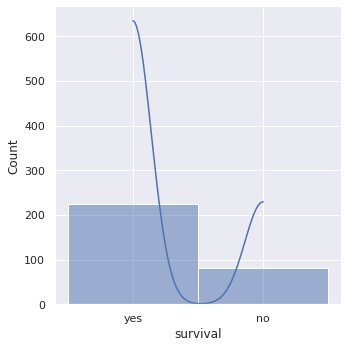

In [102]:
# Histogram แสดงจำนวนของผู้ป่วยตามการใช้ชีวิตใน 5 ปีหลัง
sns.set(rc={'figure.figsize':(12,8)})
sns.displot(data['survival'],kde=True, bins=20)

In [103]:
# แสดงจำนวนข้อมูลในแต่ละคลาสของ survival
data['survival'].value_counts()

yes    224
no      81
Name: survival, dtype: int64

In [106]:
# # ดูค่า mean, med, mode ในข้อมูลที่ดูจากค่าตัวแปร survival
print('mean: ',data2['survival'].mean())
print('med: ',data2['survival'].median())
print('mode: ',data2['survival'].mode())

mean:  1.2655737704918033
med:  1.0
mode:  0    1
dtype: int64


# Bi-variate

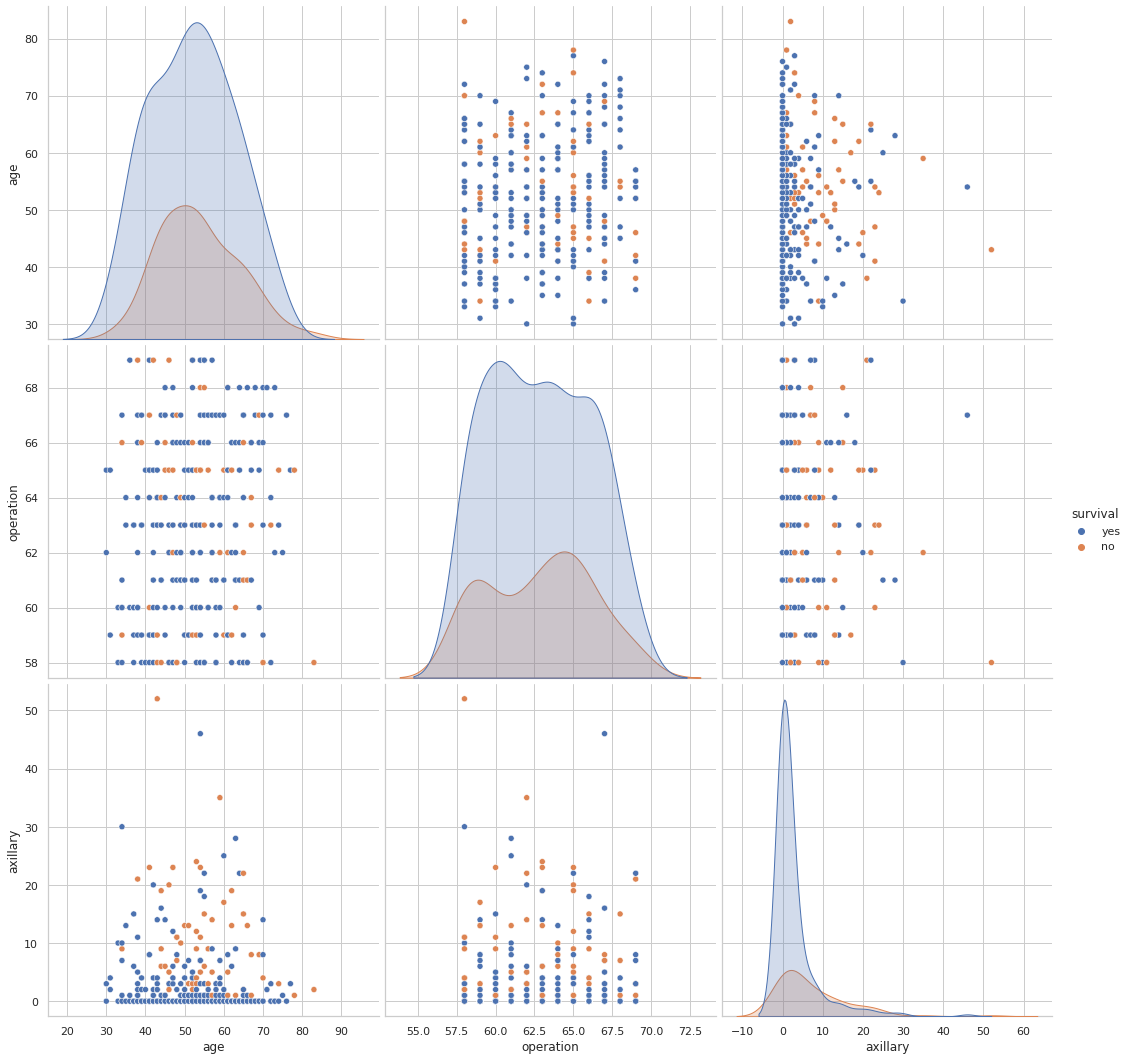

In [87]:
# ดูความสัมพันธ์ของข้อมูลจากตัวแปร 2 ตัวแปรเทียบกัน โดยมีการแบ่งตามคลาสของ survival ด้วย
sns.set_style('whitegrid')
sns.pairplot(data, hue='survival', height = 5)
plt.show()

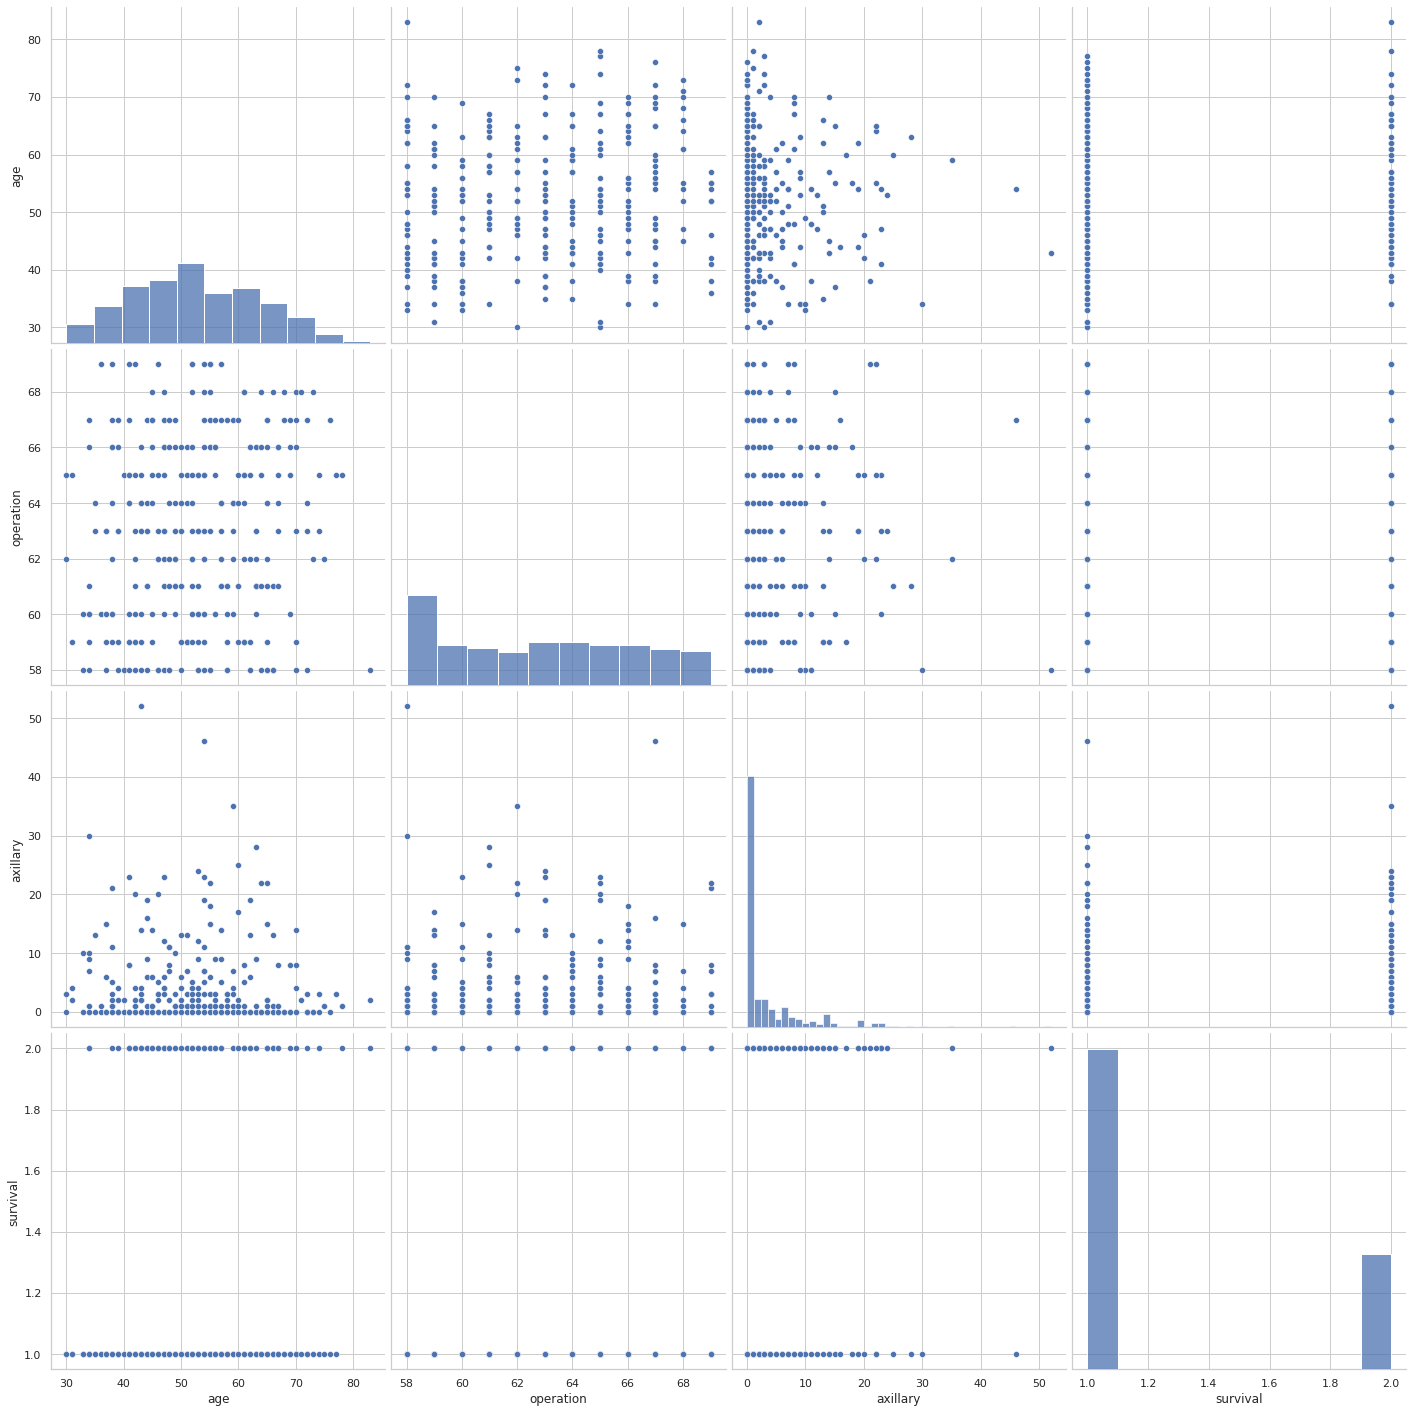

In [92]:
# ดูความสัมพันธ์ของข้อมูลจากตัวแปร 2 ตัวแปรเทียบกัน //ไม่มีการแบ่ง survival มองเป็นปัจจัยหนึ่ง
sns.set_style('whitegrid')
sns.pairplot(data2, height = 5)
plt.show()

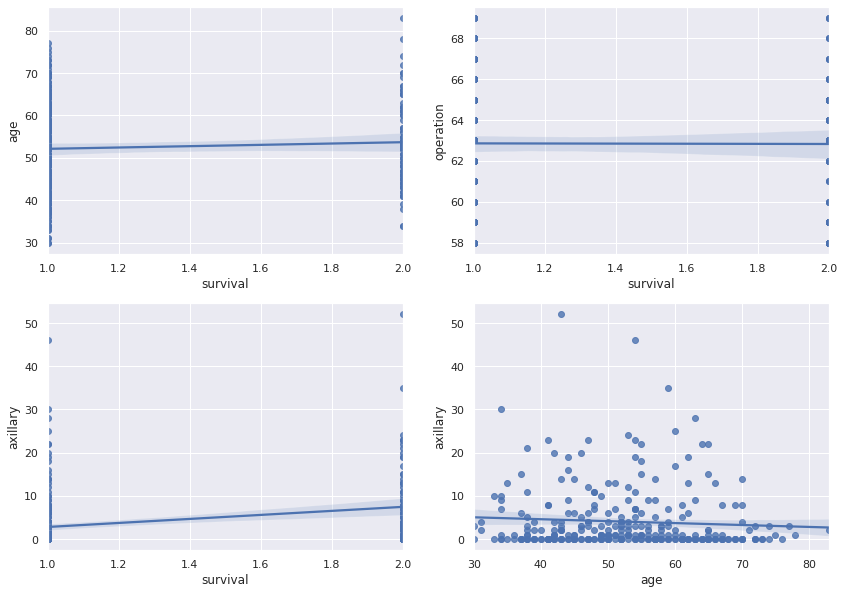

In [107]:
# พล็อตกราฟดูความสัมพันธ์ของปัจจัยต่างๆ แบบละเอียดมากขึ้น โดยเน้นเอาปัจจัยอื่นมาเทียบกับ survival
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.regplot(y='age',x='survival',data = data2,scatter=True,fit_reg=True,ax =ax1)
sns.regplot(y='operation',x='survival',data = data2,scatter=True,fit_reg=True,ax =ax2)
sns.regplot(y='axillary',x='survival',data = data2,scatter=True,fit_reg=True,ax =ax3)
sns.regplot(y='axillary',x='age',data = data2,scatter=True,fit_reg=True,ax =ax4)
#sns.regplot(x='YearBuilt',y='survival',data = data2,scatter=True,fit_reg=True,ax =ax5)
#sns.regplot(x='WoodDeckSF',y='survival',data = data2,scatter=True,fit_reg=True,ax =ax6)

In [67]:
data2=pd.read_csv('haberman.csv')
data2.columns = ['age', 'operation', 'axillary', 'survival']
data2.shape

(305, 4)

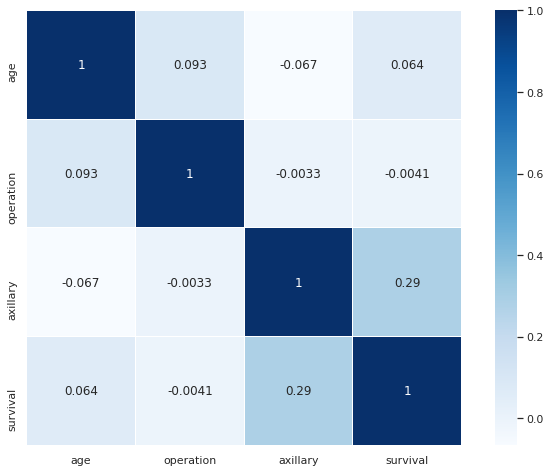

In [68]:
# ดูค่า correlation เพื่อดูการส่งผลต่อกัยของปัจจัยต่าง ๆ แบบเป็นคู่
sns.heatmap(data2.corr(),
            square=True,
            linewidths=0.25,    
            #linecolor=(0,0,0),
            cmap='Blues',
           annot=True)

In [62]:
data.head

<bound method NDFrame.head of      age  operation  axillary survival
0     30         62         3      yes
1     30         65         0      yes
2     31         59         2      yes
3     31         65         4      yes
4     33         58        10      yes
..   ...        ...       ...      ...
300   75         62         1      yes
301   76         67         0      yes
302   77         65         3      yes
303   78         65         1       no
304   83         58         2       no

[305 rows x 4 columns]>